# **COVID-19 Data Study Notebook**

## Objectives

* Fetch Data from Kaggle and save as raw file and unzip.
* Inspect the data and save it under inputs/datasets/raw
* Inspect the data and save it under outputs/datasets/collection

## Inputs

* Kaggle JSON file - the authentication token.

## Outputs

* Generate Dataset: outputs/datasets/collection/trimmed_covid_dataset.csv

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/milestone-covid-19-study/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/milestone-covid-19-study'

---

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/covid-19-dataset.csv")
    )
df.head(10)

,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DIED
0,2,4,Male,No,No,76,No,No,No,No,Yes,Yes,No,No,No,No,No,No
1,2,6,Male,No,Yes,91,Yes,No,No,No,Yes,No,No,No,No,No,No,No
2,2,12,Male,No,Yes,39,No,No,No,No,No,No,No,No,No,No,Yes,Yes
3,1,4,Female,Yes,No,80,No,Yes,No,No,No,No,No,No,No,No,No,No
4,1,4,Male,No,Yes,48,No,No,No,No,No,No,No,No,No,No,No,Yes
5,1,6,Female,No,No,77,No,No,No,No,No,No,No,No,No,No,No,No
6,1,3,Female,No,Yes,65,No,No,No,No,Yes,No,No,No,No,No,No,Yes
7,1,4,Male,No,No,56,No,No,No,Yes,No,No,No,No,No,No,No,Yes
8,2,4,Male,No,No,54,No,No,No,No,No,No,No,Yes,No,No,No,Yes
9,2,4,Male,No,No,65,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,No


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)

pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlaton Study

In [6]:
print(df.dtypes)

USMER              int64
MEDICAL_UNIT       int64
SEX               object
INTUBED           object
PNEUMONIA         object
AGE                int64
DIABETES          object
COPD              object
ASTHMA            object
INMSUPR           object
HIPERTENSION      object
OTHER_DISEASE     object
CARDIOVASCULAR    object
OBESITY           object
RENAL_CHRONIC     object
TOBACCO           object
ICU               object
DIED              object
dtype: object


In [7]:
print(df.head())

   USMER  MEDICAL_UNIT     SEX INTUBED PNEUMONIA  AGE DIABETES COPD ASTHMA  \
0      2             4    Male      No        No   76       No   No     No   
1      2             6    Male      No       Yes   91      Yes   No     No   
2      2            12    Male      No       Yes   39       No   No     No   
3      1             4  Female     Yes        No   80       No  Yes     No   
4      1             4    Male      No       Yes   48       No   No     No   

  INMSUPR HIPERTENSION OTHER_DISEASE CARDIOVASCULAR OBESITY RENAL_CHRONIC  \
0      No          Yes           Yes             No      No            No   
1      No          Yes            No             No      No            No   
2      No           No            No             No      No            No   
3      No           No            No             No      No            No   
4      No           No            No             No      No            No   

  TOBACCO  ICU DIED  
0      No   No   No  
1      No   No   No  
2 

In [8]:
print(df.select_dtypes(include=['object']).columns)

Index(['SEX', 'INTUBED', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'DIED'],
      dtype='object')


In [9]:
from feature_engine.encoding import OneHotEncoder
categorical_vars = df.columns[df.dtypes == 'object'].to_list()
encoder = OneHotEncoder(variables=categorical_vars, drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
print(df_ohe.head(3))

(62236, 33)
   USMER  MEDICAL_UNIT  AGE  SEX_Male  SEX_Female  INTUBED_No  INTUBED_Yes  \
0      2             4   76         1           0           1            0   
1      2             6   91         1           0           1            0   
2      2            12   39         1           0           1            0   

   PNEUMONIA_No  PNEUMONIA_Yes  DIABETES_No  ...  OBESITY_No  OBESITY_Yes  \
0             1              0            1  ...           1            0   
1             0              1            0  ...           1            0   
2             0              1            1  ...           1            0   

   RENAL_CHRONIC_No  RENAL_CHRONIC_Yes  TOBACCO_No  TOBACCO_Yes  ICU_No  \
0                 1                  0           1            0       1   
1                 1                  0           1            0       1   
2                 1                  0           1            0       0   

   ICU_Yes  DIED_No  DIED_Yes  
0        0        1         0  
1

Calculate correlations with Spearman method

In [11]:
target_variable = 'DIED_Yes'
corr_spearman_all = df_ohe.corr(method='spearman')['DIED_Yes'].sort_values(key=abs, ascending=False)
print("Spearman Correlations with DIED_Yes:")
print(corr_spearman_all)

Spearman Correlations with DIED_Yes:
DIED_Yes              1.000000
DIED_No              -1.000000
INTUBED_No            0.351499
INTUBED_Yes          -0.351499
AGE                  -0.201491
PNEUMONIA_No          0.153294
PNEUMONIA_Yes        -0.153294
HIPERTENSION_No       0.074987
HIPERTENSION_Yes     -0.074987
DIABETES_No           0.073502
DIABETES_Yes         -0.073502
MEDICAL_UNIT          0.071937
ASTHMA_Yes            0.061514
ASTHMA_No            -0.061514
USMER                 0.051883
SEX_Male             -0.049660
SEX_Female            0.049660
ICU_No                0.047956
ICU_Yes              -0.047956
INMSUPR_No           -0.034243
INMSUPR_Yes           0.034243
RENAL_CHRONIC_No      0.024492
RENAL_CHRONIC_Yes    -0.024492
OBESITY_No            0.016068
OBESITY_Yes          -0.016068
TOBACCO_No           -0.015930
TOBACCO_Yes           0.015930
OTHER_DISEASE_No     -0.015113
OTHER_DISEASE_Yes     0.015113
COPD_Yes             -0.008357
COPD_No               0.008357
CA

Calculate correlations with Pearson method

In [12]:
corr_pearson = df_ohe.corr(method='pearson')[target_variable].sort_values(key=abs, ascending=False)[1:]
print("Pearson Correlations with DIED_Yes:")
print(corr_pearson)

Pearson Correlations with DIED_Yes:
DIED_No              -1.000000
INTUBED_Yes          -0.351499
INTUBED_No            0.351499
AGE                  -0.207798
PNEUMONIA_Yes        -0.153294
PNEUMONIA_No          0.153294
HIPERTENSION_No       0.074987
HIPERTENSION_Yes     -0.074987
DIABETES_Yes         -0.073502
DIABETES_No           0.073502
MEDICAL_UNIT          0.070883
ASTHMA_No            -0.061514
ASTHMA_Yes            0.061514
USMER                 0.051883
SEX_Female            0.049660
SEX_Male             -0.049660
ICU_No                0.047956
ICU_Yes              -0.047956
INMSUPR_No           -0.034243
INMSUPR_Yes           0.034243
RENAL_CHRONIC_Yes    -0.024492
RENAL_CHRONIC_No      0.024492
OBESITY_Yes          -0.016068
OBESITY_No            0.016068
TOBACCO_Yes           0.015930
TOBACCO_No           -0.015930
OTHER_DISEASE_Yes     0.015113
OTHER_DISEASE_No     -0.015113
COPD_No               0.008357
COPD_Yes             -0.008357
CARDIOVASCULAR_No    -0.002629
CAR

Combine top variables from both methods

In [13]:
top_n = 9
top_vars = set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())
print("Variables to study:")
print(top_vars)

Variables to study:
{'INTUBED_Yes', 'PNEUMONIA_No', 'DIED_No', 'HIPERTENSION_Yes', 'PNEUMONIA_Yes', 'HIPERTENSION_No', 'INTUBED_No', 'DIED_Yes', 'DIABETES_Yes', 'AGE'}


Variables to study

- INTUBED. Patients who were not intubated were more likely to die.
- AGE. Older age is associated with a higher likelihood of death.
- PNEUMONIA. Patients who had pneumonia were more likely to die.
- HIPERTENSION. Hypertension slightly increases the risk of death.
- DIABETES. Diabetes is a weak risk factor for increased mortality.

Filter the dataset for the variables to study

In [17]:
variables_to_study = list(top_vars)

if 'DIED_Yes' not in variables_to_study:
    variables_to_study.append('DIED_Yes')

df_study = df_ohe[variables_to_study]
print("Shape of the study DataFrame:", df_study.shape)
print(df_study.head())

Shape of the study DataFrame: (62236, 10)
   INTUBED_Yes  PNEUMONIA_No  DIED_No  HIPERTENSION_Yes  PNEUMONIA_Yes  \
0            0             1        1                 1              0   
1            0             0        1                 1              1   
2            0             0        0                 0              1   
3            1             1        1                 0              0   
4            0             0        0                 0              1   

   HIPERTENSION_No  INTUBED_No  DIED_Yes  DIABETES_Yes  AGE  
0                0           1         0             0   76  
1                0           1         0             1   91  
2                1           1         1             0   39  
3                1           0         0             0   80  
4                1           1         1             0   48  


## Variables Distribution by Died

Plot the distribution (numerical and categorical) coloured by Died.

Shape of the study DataFrame: (62236, 10)
   INTUBED_Yes  PNEUMONIA_No  DIED_No  HIPERTENSION_Yes  PNEUMONIA_Yes  \
0            0             1        1                 1              0   
1            0             0        1                 1              1   
2            0             0        0                 0              1   
3            1             1        1                 0              0   
4            0             0        0                 0              1   

   HIPERTENSION_No  INTUBED_No  DIED_Yes  DIABETES_Yes  AGE  
0                0           1         0             0   76  
1                0           1         0             1   91  
2                1           1         1             0   39  
3                1           0         0             0   80  
4                1           1         1             0   48  


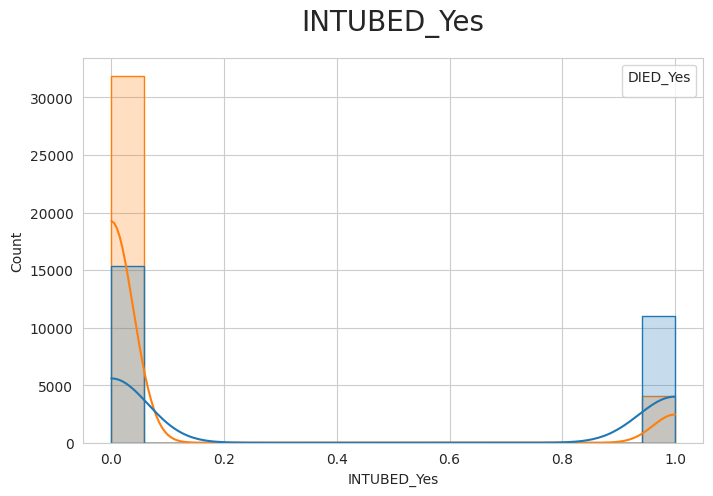

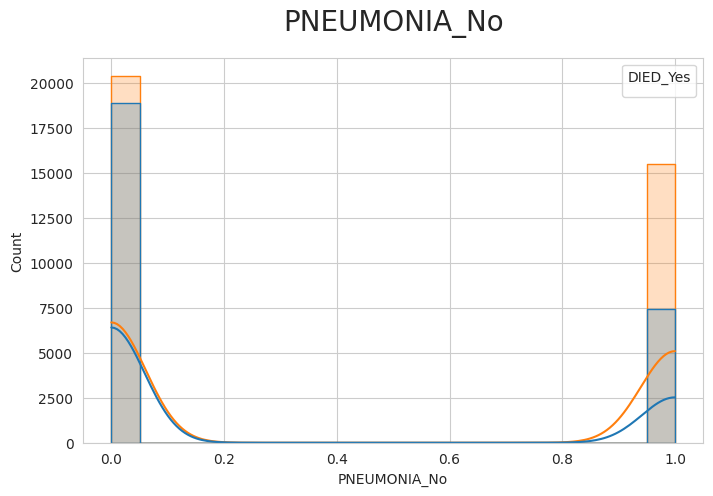

/workspace/.pip-modules/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


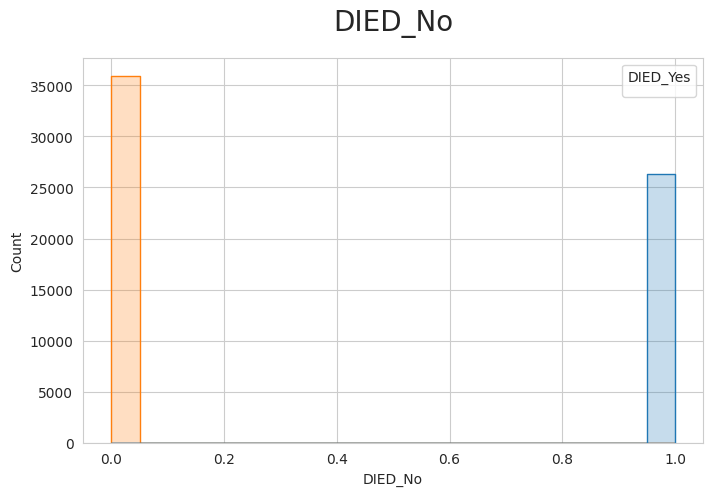

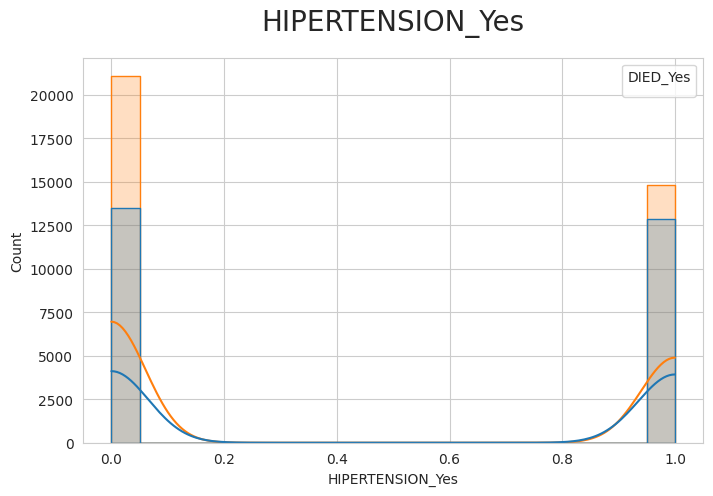

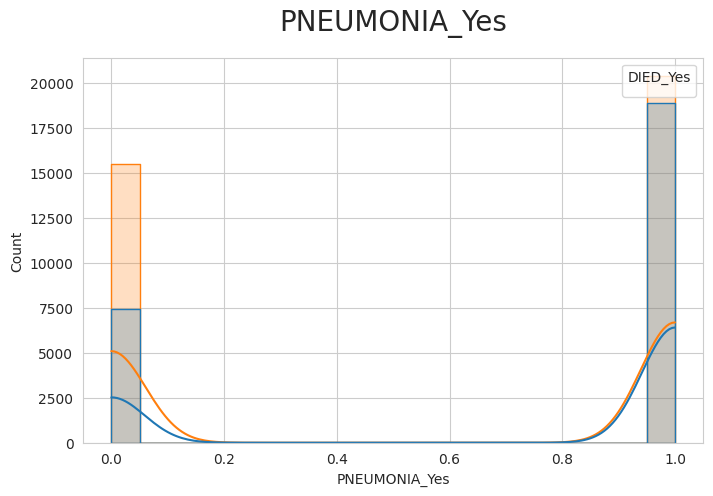

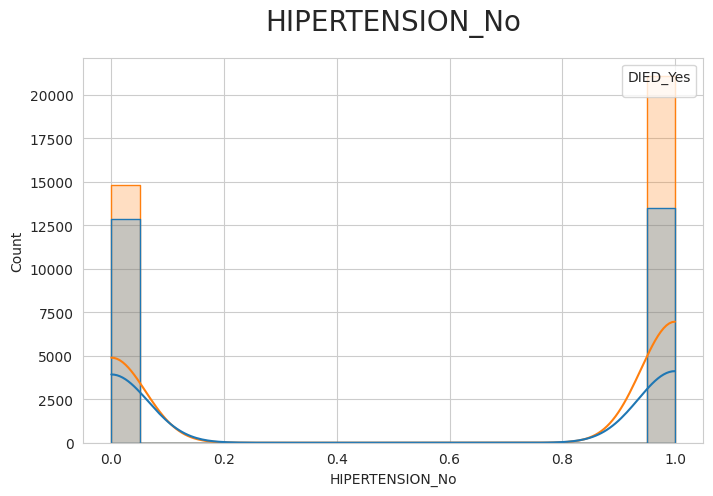

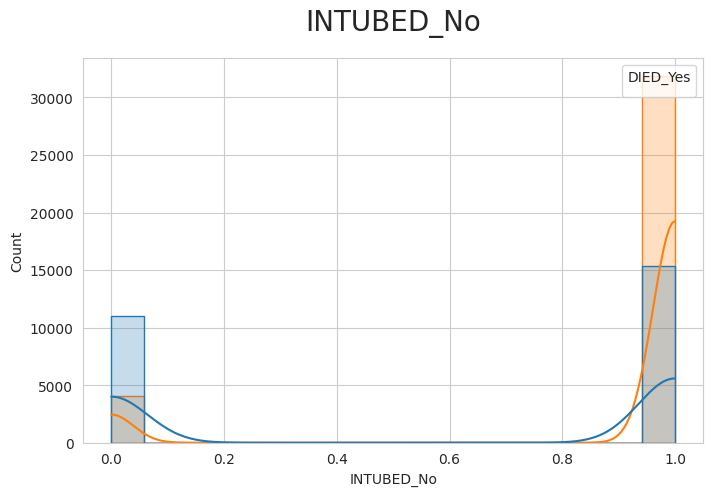

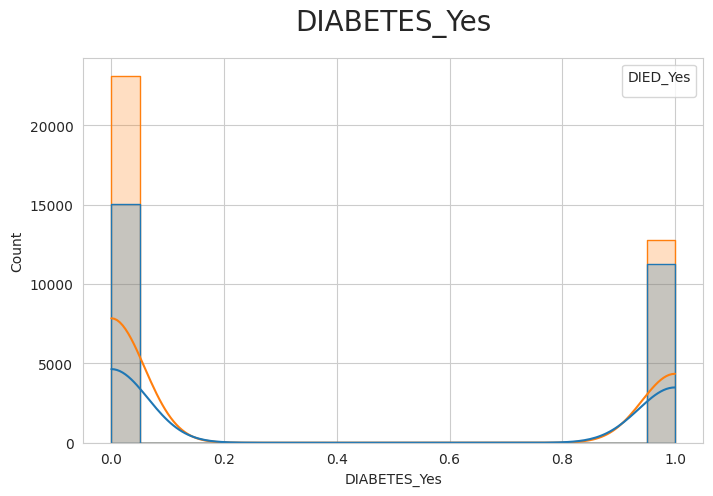

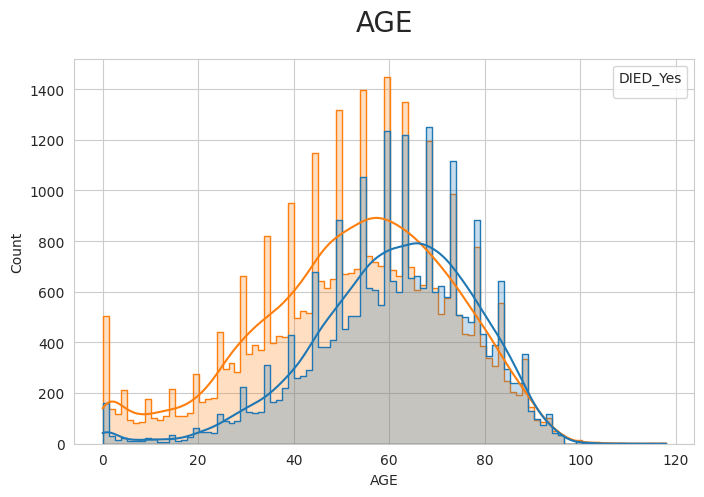

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')

def plot_categorical(df, col, target_var):
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = ['Didn\'t die', 'Died']
    plt.legend(handles, labels, title=target_var, loc='upper right')
    plt.show()

def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = ['Didn\'t die', 'Died']
    plt.legend(handles, labels, title=target_var, loc='upper right')
    plt.show()

variables_to_study = list(top_vars)

if 'DIED_Yes' not in variables_to_study:
    variables_to_study.append('DIED_Yes')

df_study = df_ohe[variables_to_study]
print("Shape of the study DataFrame:", df_study.shape)
print(df_study.head())

target_var = 'DIED_Yes'

for col in variables_to_study:
    if col == target_var:
        continue
    if pd.api.types.is_categorical_dtype(df_study[col]) or pd.api.types.is_object_dtype(df_study[col]):
        plot_categorical(df_study, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_study, col, target_var)
        print("\n\n")


## Conclusions and Next Steps

The correlations and plots interpretation converge.

- A churned customer typically has a month-to-month contract.
- A churned customer typically has fiber optic.
- A churned customer typically doesn't have tech support.
- A churned customer doesn't have online security.
- A churned customer typically has low tenure levels